In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os

%matplotlib inline

In [137]:
df_18_20raw = pd.read_csv(r'./datos_mes_18_20.csv')
df_01_17_raw = pd.read_csv(r'./datos_mes_01_18.csv')
df_01_17_raw['date'] = pd.to_datetime(df_01_17_raw['date'], format = '%Y-%m-%d')


In [138]:
df_01_17_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     209 non-null    datetime64[ns]
 1   BEN      209 non-null    float64       
 2   CO       209 non-null    float64       
 3   EBE      209 non-null    float64       
 4   MXY      114 non-null    float64       
 5   NMHC     209 non-null    float64       
 6   NO_2     209 non-null    float64       
 7   NOx      129 non-null    float64       
 8   OXY      114 non-null    float64       
 9   O_3      209 non-null    float64       
 10  PM10     209 non-null    float64       
 11  PXY      114 non-null    float64       
 12  SO_2     209 non-null    float64       
 13  TCH      209 non-null    float64       
 14  TOL      209 non-null    float64       
 15  station  209 non-null    float64       
 16  PM25     172 non-null    float64       
 17  NO       89 non-null     float64   

In [159]:
df_01_17_equal = df_01_17_raw[['date', 'BEN', 'NO_2', 'O_3', 'TCH']]


df_01_17_equal = df_01_17_raw.loc[~(df_01_17_raw['date'].dt.year == 2018)]

df_01_17_clean = df_01_17_equal[['date', 'BEN', 'NO_2', 'O_3', 'TCH']]


df_01_17_clean

,date,BEN,NO_2,O_3,TCH
0,2001-01-31,4.288614,57.026588,19.518731,1.541657
1,2001-02-28,4.388892,64.654926,20.537844,1.541261
2,2001-03-31,3.112439,49.401208,29.003657,1.436774
3,2001-04-30,2.564130,53.098803,40.265716,1.347268
4,2001-05-31,2.710334,64.109276,41.040143,1.390607
...,...,...,...,...,...
199,2017-08-31,0.293300,28.006533,65.795859,1.374317
200,2017-09-30,0.492104,39.931810,51.708907,1.389012
201,2017-10-31,0.725990,53.020867,33.602094,1.419913
202,2017-11-30,1.051838,62.463846,21.511554,1.446257


In [160]:
df_01_17_clean.rename(columns={'date': 'FECHA'}, inplace=True)

C:\Users\edulo\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [161]:
df_01_17_clean.head()
df_18_20raw

df_01_17_clean['FECHA'] = pd.to_datetime(df_01_17_clean['FECHA'], format = '%Y-%m-%d')
df_18_20raw['FECHA'] = pd.to_datetime(df_18_20raw['FECHA'], format = '%Y-%m-%d')

<ipython-input-161-5941a5516e23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_01_17_clean['FECHA'] = pd.to_datetime(df_01_17_clean['FECHA'], format = '%Y-%m-%d')


In [162]:
df_18_20raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   FECHA   34 non-null     datetime64[ns]
 1   BEN     34 non-null     float64       
 2   NO_2    34 non-null     float64       
 3   O_3     34 non-null     float64       
 4   TCH     34 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.5 KB


In [163]:
df_01_20_clean = pd.concat([df_01_17_clean, df_18_20raw])

In [164]:

df_18_20raw.loc[(df_18_20raw['FECHA'].dt.year == 2018)]

,FECHA,BEN,NO_2,O_3,TCH
0,2018-01-31,0.723118,48.689516,6.458065,1.317849
1,2018-02-28,0.660119,45.831845,6.189286,1.377857
2,2018-03-31,0.434946,29.513441,4.425806,1.320753
3,2018-04-30,0.395000,30.966667,4.563333,1.329444
4,2018-05-31,0.305914,29.341398,4.274194,1.355591
5,2018-06-30,0.230556,26.984722,4.610000,1.273778
6,2018-07-31,0.225806,27.477151,5.438710,1.363656
7,2018-08-31,0.210215,28.629032,5.096774,1.373118
8,2018-09-30,0.316111,37.727778,5.663333,1.399333
9,2018-10-31,0.502688,39.794355,9.787097,1.436559


In [167]:
df_01_20_index = df_01_20_clean.set_index('FECHA')

In [165]:
df_01_20_clean.head()
df_01_20_clean.loc[(df_01_20_clean['FECHA'].dt.year == 2018)]

,FECHA,BEN,NO_2,O_3,TCH
0,2018-01-31,0.723118,48.689516,6.458065,1.317849
1,2018-02-28,0.660119,45.831845,6.189286,1.377857
2,2018-03-31,0.434946,29.513441,4.425806,1.320753
3,2018-04-30,0.395000,30.966667,4.563333,1.329444
4,2018-05-31,0.305914,29.341398,4.274194,1.355591
5,2018-06-30,0.230556,26.984722,4.610000,1.273778
6,2018-07-31,0.225806,27.477151,5.438710,1.363656
7,2018-08-31,0.210215,28.629032,5.096774,1.373118
8,2018-09-30,0.316111,37.727778,5.663333,1.399333
9,2018-10-31,0.502688,39.794355,9.787097,1.436559


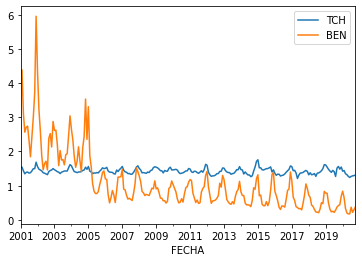

In [170]:
df_01_20_index[['TCH', 'BEN']].plot();

In [171]:
df_01_20_index.to_csv('datos_mes_01_20.csv')